In [1]:
from PIL import Image, ImageDraw

import numpy

import toyplot.font
import toyplot.text

import IPython.display

import xml.etree.ElementTree as xml
import sys
import logging
logging.basicConfig(level=logging.DEBUG)
toyplot.log.setLevel(logging.DEBUG)

In [2]:
#text = """This is <i>italic</i>, <b>bold</b>,<br/><code>monospace</code>, <small>small</small>, <span style="font-size:24px">large</span>,<br/><sup>superscript</sup> and <sub>subscript</sub> text<br/>for your <span style="fill:red">amusement!</span>"""
#text = """<span style="alignment-baseline:hanging">Hanging</span><span style="alignment-baseline:central">Central</span><span style="alignment-baseline:middle">Middle</span><span style="alignment-baseline:alphabetic">Alpha</span>"""
text = """Hello, <small>World!</small>"""
style = {"font-family":"helvetica", "font-size":"16px"}
fonts = toyplot.font.ReportlabLibrary()

layout = toyplot.text.layout(text=text, style=style, fonts=fonts)

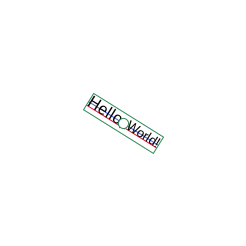

In [3]:
def draw(layout, show_layout_box=True, show_anchor=True, show_line_baseline=True, show_text_baseline=True, angle=0, show_extent=False):
    size = max(layout.width, layout.height)
    
    svg = xml.Element(
        "svg",
        width=str(int(size*3)),
        height=str(int(size*3)),
        style="border: 1px solid #f0f0f0",
    )
    group = xml.SubElement(
        svg,
        "g",
        transform="translate(%s %s)rotate(%s)" % (size*1.5, size*1.5, -angle),
    )

    for line in layout.children:
        if show_line_baseline:
            xml.SubElement(
                group,
                "line",
                x1=str(line.left),
                y1=str(line.baseline),
                x2=str(line.right),
                y2=str(line.baseline),
                stroke="royalblue")

        for box in line.children:
            if isinstance(box, toyplot.text.TextBox):
                if show_text_baseline:
                    xml.SubElement(
                        group,
                        "line",
                        x1=str(box.left),
                        y1=str(box.baseline),
                        x2=str(box.right),
                        y2=str(box.baseline),
                        stroke="crimson")

                xml.SubElement(
                    group,
                    "text",
                    x=str(box.left),
                    y=str(box.baseline),
                    style=toyplot.style.to_css(box.style),
                ).text = box.text

    if show_anchor:
        xml.SubElement(
            group,
            "circle",
            cx="0",
            cy="0",
            r="5",
            fill="white",
            stroke="seagreen",
        )
        
    if show_layout_box:
        xml.SubElement(
            group,
            "rect",
            x=str(layout.left),
            y=str(layout.top),
            width=str(layout.width),
            height=str(layout.height),
            fill="none",
            stroke="seagreen",
            )
        
    if show_extent:
        left, right, top, bottom = toyplot.text.extents(layout, angle)
        xml.SubElement(
            svg,
            "rect",
            x=str(left),
            y=str(top),
            width=str(right - left),
            height=str(bottom - top),
            fill="none",
            stroke="purple",
            transform="translate(%s %s)" % (size*1.5, size*1.5),
        )

    return svg

IPython.display.SVG(xml.tostring(draw(layout, angle=-32)))

In [4]:
def series(x):
    return numpy.cumsum(numpy.random.normal(loc=0.05, size=len(x)))

numpy.random.seed(1234)
x = numpy.arange(100)
y = numpy.column_stack([series(x) for i in range(5)])

label_style = {"text-anchor":"start", "-toyplot-anchor-shift":"5px"}
canvas, axes, mark = toyplot.plot(x, y)
for i in range(y.shape[1]):
    axes.text(x[-1], y[-1,i], "Series %s" % i, style=label_style)

<path d="M 50.0 343.30087555569042 L 54.641871792837946 358.76135566453911 L 59.283743585675886 338.67033909078077 L 63.925615378513818 342.22933200703397 L 68.567487171351772 351.31596182878047 L 73.209358964189704 338.61719088685834 L 77.85123075702765 326.29206105038509 L 82.493102549865583 334.23958790436393 L 87.134974342703543 333.34938712356637 L 91.776846135541476 363.06076684570553 L 96.418717928379408 346.80000990056152 L 101.06058972121735 332.68140437052244 L 105.7024615140553 319.08613428950554 L 110.34433330689323 345.79708534524832 L 114.98620509973117 349.64639824807938 L 119.62807689256911 348.94018255546365 L 124.26994868540707 342.7686852634904 L 128.91182047824501 338.17391235735818 L 133.55369227108292 319.59440706740986 L 138.1955640639209 339.87781769385589 L 142.83743585675882 341.94621010271032 L 147.47930764959676 350.15723250669089 L 152.12117944243471 346.85881750412 L 156.76305123527266 338.68208304515144 L 161.4049230281106 320.14331838309238 L 166.04679482094852 325.82500033636006 L 170.68866661378647 315.99357749977253 L 175.33053840662444 339.93719822301676 L 179.97241019946233 341.74084920988963 L 184.61428199230031 326.71406455065926 L 189.25615378513822 331.42737873788826 L 193.89802557797617 326.17751043227213 L 198.53989737081415 311.30507119203736 L 203.18176916365206 296.45485862373476 L 207.82364095649001 284.07378155194061 L 212.46551274932796 285.05063878397374 L 217.10738454216587 282.68323853257175 L 221.74925633500382 286.37967017916287 L 226.3911281278418 274.29727506084549 L 231.03299992067969 241.22170502820774 L 235.67487171351766 239.51167191658698 L 240.31674350635558 246.50963170862573 L 244.95861529919353 245.34238887880855 L 249.60048709203147 272.78129582624058 L 254.24235888486942 268.74614380491101 L 258.88423067770736 280.22531086839143 L 263.52610247054531 281.40140059529233 L 268.16797426338326 280.47606652428431 L 272.80984605622115 269.56252392033031 L 277.45171784905915 265.96807432897805 L 282.09358964189704 253.89470255186058 L 286.73546143473499 272.80824648797909 L 291.37733322757293 291.12779187646879 L 296.01920502041088 291.8177450640265 L 300.66107681324888 298.5690435454714 L 305.30294860608672 299.85115939933308 L 309.94482039892466 294.37659202816417 L 314.58669219176267 294.18029022650109 L 319.22856398460061 285.8368961670983 L 323.87043577743856 264.21535652880709 L 328.51230757027645 276.73896901273548 L 333.15417936311439 277.01464672370184 L 337.79605115595234 272.16408733726496 L 342.43792294879029 274.31178161826006 L 347.07979474162829 259.62603524752717 L 351.72166653446624 291.47521645350804 L 356.36353832730407 263.28256428430268 L 361.00541012014202 278.08796670314047 L 365.64728191298002 274.53938726284287 L 370.28915370581797 264.31275118801011 L 374.93102549865591 274.27806553744244 L 379.57289729149386 267.33953966203114 L 384.21476908433175 257.11957570364899 L 388.8566408771697 249.34841232915696 L 393.49851267000764 261.22185752827852 L 398.14038446284565 233.33761761392813 L 402.78225625568354 229.58471219328044 L 407.42412804852148 244.52599385642833 L 412.06599984135937 235.2850172909387 L 416.70787163419737 234.07210003202334 L 421.34974342703532 227.10196706031289 L 425.99161521987327 274.71091674759964 L 430.63348701271116 256.13212388333852 L 435.2753588055491 253.38643382496335 L 439.91723059838705 250.4795097365234 L 444.559102391225 255.62989277756344 L 449.200974184063 244.55436054727699 L 453.84284597690089 230.5309613597797 L 458.48471776973884 226.18356265356235 L 463.12658956257673 206.64432184024415 L 467.76846135541473 204.88492897423461 L 472.41033314825268 209.62702862084637 L 477.05220494109057 222.87712604366445 L 481.69407673392851 230.12267939540638 L 486.33594852676651 218.38013463656404 L 490.9778203196044 218.81302445323067 L 495.61969211244235 222.80717097299581 L 500.2615639052803 214.97123510772443 L 504.90343569811824 228.77876483094741 L 509.54530749095619 235.03736159644751" style="stroke:rgb(40%,76.1%